In [1]:
# Задание вытащить все вакансии СБЕРа с ХХ
# Вытащите все описания этих вакансий
# Создайте DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите вакансии с использованием python
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных навыков


In [2]:
import requests
from tqdm.auto import tqdm
from collections import defaultdict
import pandas as pd

In [7]:
a = pd.DataFrame([[1,2],[2,1]],columns=)

In [8]:
a

,0,1
0,1,2
1,2,1


In [9]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'
res = requests.get(url)

In [12]:
r = res.json()

In [13]:
r.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [14]:
r['items']

[{'id': '72075640',
  'premium': False,
  'name': 'Исполнительный директор - Marketing Team Lead Мобильное приложение Салют',
  'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
  'has_test': False,
  'response_letter_required': False,
  'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
  'salary': None,
  'type': {'id': 'open', 'name': 'Открытая'},
  'address': None,
  'response_url': None,
  'sort_point_distance': None,
  'published_at': '2022-11-28T15:52:29+0300',
  'created_at': '2022-11-28T15:52:29+0300',
  'archived': False,
  'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=72075640',
  'insider_interview': None,
  'url': 'https://api.hh.ru/vacancies/72075640?host=hh.ru',
  'adv_response_url': 'https://api.hh.ru/vacancies/72075640/adv_response?host=hh.ru',
  'alternate_url': 'https://hh.ru/vacancy/72075640',
  'relations': [],
  'employer': {'id': '3529',
   'name': 'СБЕР',
   'url': 'https://api.hh.ru/employ

In [16]:
msv = r.get('items')

In [17]:
msv[0]

{'id': '72075640',
 'premium': False,
 'name': 'Исполнительный директор - Marketing Team Lead Мобильное приложение Салют',
 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2022-11-28T15:52:29+0300',
 'created_at': '2022-11-28T15:52:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=72075640',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/72075640?host=hh.ru',
 'adv_response_url': 'https://api.hh.ru/vacancies/72075640/adv_response?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/72075640',
 'relations': [],
 'employer': {'id': '3529',
  'name': 'СБЕР',
  'url': 'https://api.hh.ru/employers/3529',
  'alternate_

In [18]:
pd.json_normalize(msv[:3])

,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,published_at,...,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id
0,72075640,False,Исполнительный директор - Marketing Team Lead ...,False,False,None,NaN,None,None,2022-11-28T15:52:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73392819,False,Frontend developer (СБОЛ.про),False,False,None,NaN,None,None,2022-12-06T13:48:41+0300,...,37.532071,"Москва, Кутузовский проспект, 32",Кутузовская,МЦК,95.536,95,55.740833,37.533333,"[{'station_name': 'Кутузовская', 'line_name': ...",823806
2,71833531,False,Аналитик данных,False,False,None,NaN,None,None,2022-11-28T17:00:15+0300,...,37.531127,"Москва, Кутузовский проспект, 32к1",Кутузовская,Филевская,4.73,4,55.740544,37.534100,"[{'station_name': 'Кутузовская', 'line_name': ...",731097


In [19]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [20]:
vacancy_ids

['72075640',
 '73392819',
 '71833531',
 '72192570',
 '67264345',
 '68562912',
 '72221358',
 '70696415',
 '72743379',
 '72809176',
 '73070747',
 '71919324',
 '72477650',
 '71562137',
 '72371371',
 '73471929',
 '71326769',
 '73334022',
 '72288883',
 '72142318',
 '73136258',
 '55898374',
 '73023880',
 '71499165',
 '72559511',
 '72426037',
 '72687778',
 '72809425',
 '73075081',
 '71420044',
 '73153696',
 '73525666',
 '73248109',
 '73248548',
 '72723854',
 '73142752',
 '71868080',
 '73529545',
 '72536242',
 '73040681',
 '67752294',
 '69413715',
 '72429458',
 '73224488',
 '71921533',
 '69166398',
 '71811063',
 '72462596',
 '72174882',
 '72866678',
 '72074894',
 '72760016',
 '72298123',
 '73171834',
 '72014132',
 '73457011',
 '72056697',
 '73340832',
 '71923585',
 '73325452',
 '72081359',
 '72793411',
 '73356312',
 '72529984',
 '69854894',
 '71576542',
 '72682864',
 '72124061',
 '69990657',
 '72810717',
 '67136889',
 '72936405',
 '73072630',
 '72213038',
 '72194489',
 '72941037',
 '69034827',

In [21]:
all_vacancy_ids= []
for i in tqdm(range(num_pages)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/15 [00:00<?, ?it/s]

In [22]:
len(all_vacancy_ids)

1418

In [23]:
all_vacancy_ids

['55889794',
 '45790891',
 '73524445',
 '73527561',
 '73131557',
 '72851580',
 '73530342',
 '71284501',
 '71284827',
 '72724889',
 '71696681',
 '55415496',
 '73331967',
 '73500032',
 '73042210',
 '67498659',
 '73296562',
 '72300605',
 '69355530',
 '72750106',
 '73205201',
 '73209857',
 '73472953',
 '73505247',
 '72868230',
 '72813042',
 '70761595',
 '72088729',
 '72753677',
 '70983774',
 '72252250',
 '70771919',
 '71915383',
 '72213822',
 '72304041',
 '71562196',
 '72191115',
 '72939827',
 '69960848',
 '71579194',
 '73462363',
 '67349462',
 '67499784',
 '73441018',
 '68682811',
 '72880776',
 '73146508',
 '73405753',
 '73403211',
 '73401418',
 '72112571',
 '72941496',
 '73077065',
 '72694841',
 '73386670',
 '73184313',
 '71204600',
 '73399767',
 '71776806',
 '73392793',
 '72209672',
 '71889586',
 '72952363',
 '71807134',
 '73242046',
 '70407032',
 '72736690',
 '72672997',
 '72684620',
 '71431106',
 '73142370',
 '73148941',
 '72854875',
 '68363939',
 '72867512',
 '72076369',
 '71562523',

In [24]:
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()


In [25]:
vacancy

{'id': '43326020',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Специалист по экономической безопасности',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'},
 'contacts': None,
 'description': '<p><strong>Обязанности:</strong></p> <p> </p> <ul> <li>Поиск и анализ информации в отношении клиентов/контрагентов Банка для оценки уровня кредитных рисков, рисков деловой репутации, иных рисков сотрудничества с контрагентами, в т.ч. в рамках закупочных процедур, реализации строительных программ, б

In [26]:
tabdict = defaultdict(list)
for vac_id in tqdm(all_vacancy_ids[:300]):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacancy = res.json()
    tabdict['id'].append(vacancy.get('id'))
    tabdict['name'].append(vacancy.get('name'))
    tabdict['description'].append(vacancy.get('description'))
    tabdict['skills'].append(vacancy.get('key_skills'))
    tabdict['published_at'].append(vacancy.get('published_at'))

  0%|          | 0/300 [00:00<?, ?it/s]

In [27]:
sk = tabdict.get('skills')
tabdict['skills'] = [','.join([y.get('name') for y in x]) for x in sk]

In [28]:
tabdict['skills']

['',
 'Прямые продажи,Финансовый анализ,Клиентоориентированность,Развитие продаж,Ведение переговоров,Активные продажи,Навыки продаж,Проведение презентаций,Работа с ключевыми клиентами,Работа с юридическими лицами',
 '',
 '',
 '',
 '',
 '',
 'Пользователь ПК,Грамотная речь,Работа в команде,Умение работать в команде,Администрирование',
 'Планирование рабочего дня руководителя,Организация встреч,Административная поддержка руководителя,Исполнение личных поручений руководителя,Документооборот',
 'Работа с большим объемом информации,MS Word,MS Excel,Аналитический склад ума',
 'Активные продажи,Проведение презентаций,Привлечение клиентов,Навыки продаж,Клиентоориентированность,Работа с юридическими лицами',
 '',
 'Руководство коллективом,Организаторские навыки,MS SQL,MS PowerPoint,MS Project,MS Excel',
 '',
 'Написание пресс-релизов,Написание текстов,Грамотная речь,PR,Работа со СМИ,Tech PR,Коммуникативная стратегия,Анализ эффективности PR,Разработка PR стратегии',
 'Развитие продаж,Поиск и при

In [29]:

df = pd.DataFrame(tabdict)

In [30]:
df

,id,name,description,skills,published_at
0,55889794,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас бо...,,2022-12-07T23:08:00+0300
1,45790891,Менеджер по работе с ключевыми клиентами малог...,<p>Сбер — лучший работодатель России. У нас бо...,"Прямые продажи,Финансовый анализ,Клиентоориент...",2022-11-28T18:00:43+0300
2,73524445,Старший охранник,"<p>Сбер – это стабильность, забота о команде и...",,2022-12-08T15:09:43+0300
3,73527561,Тестировщик (СбербанкОнлайн),<p>Наша команда разрабатывает и помогает вывод...,,2022-12-08T15:56:31+0300
4,73131557,Junior QA Engineer,<p>Наша команда делает решение по управлению A...,,2022-11-30T13:04:10+0300
...,...,...,...,...,...
295,73322458,DevOps инженер (СберЧат),"<p>Приглашаем Middle / Senior DevOps инженера,...","Linux,Python,Bash,PostgreSQL,SQL,Kubernetes,Do...",2022-12-05T11:34:01+0300
296,67500653,Старший клиентский менеджер,<p><strong>Старший клиентский менеджер</strong...,"Деловая переписка,Деловое общение,Развитие про...",2022-11-28T15:52:13+0300
297,69630798,Frontend-разработчик,<p>Наша команда разрабатывает внутренний порта...,,2022-11-28T09:53:50+0300
298,72225014,Senior С++ Developer,<p><strong>SberDevices</strong> - департамент ...,,2022-11-28T09:49:18+0300


In [31]:
df.published_at = pd.to_datetime(df.published_at)

In [32]:
df.published_at

0     2022-12-07 23:08:00+03:00
1     2022-11-28 18:00:43+03:00
2     2022-12-08 15:09:43+03:00
3     2022-12-08 15:56:31+03:00
4     2022-11-30 13:04:10+03:00
                 ...           
295   2022-12-05 11:34:01+03:00
296   2022-11-28 15:52:13+03:00
297   2022-11-28 09:53:50+03:00
298   2022-11-28 09:49:18+03:00
299   2022-11-28 09:55:00+03:00
Name: published_at, Length: 300, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [33]:
df['weekday'] = df.published_at.dt.weekday

In [46]:
df

,id,name,description,skills,published_at,weekday
0,55889794,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас бо...,,2022-12-07 23:08:00+03:00,2
1,45790891,Менеджер по работе с ключевыми клиентами малог...,<p>Сбер — лучший работодатель России. У нас бо...,"Прямые продажи,Финансовый анализ,Клиентоориент...",2022-11-28 18:00:43+03:00,0
2,73524445,Старший охранник,"<p>Сбер – это стабильность, забота о команде и...",,2022-12-08 15:09:43+03:00,3
3,73527561,Тестировщик (СбербанкОнлайн),<p>Наша команда разрабатывает и помогает вывод...,,2022-12-08 15:56:31+03:00,3
4,73131557,Junior QA Engineer,<p>Наша команда делает решение по управлению A...,,2022-11-30 13:04:10+03:00,2
...,...,...,...,...,...,...
295,73322458,DevOps инженер (СберЧат),"<p>Приглашаем Middle / Senior DevOps инженера,...","Linux,Python,Bash,PostgreSQL,SQL,Kubernetes,Do...",2022-12-05 11:34:01+03:00,0
296,67500653,Старший клиентский менеджер,<p><strong>Старший клиентский менеджер</strong...,"Деловая переписка,Деловое общение,Развитие про...",2022-11-28 15:52:13+03:00,0
297,69630798,Frontend-разработчик,<p>Наша команда разрабатывает внутренний порта...,,2022-11-28 09:53:50+03:00,0
298,72225014,Senior С++ Developer,<p><strong>SberDevices</strong> - департамент ...,,2022-11-28 09:49:18+03:00,0


<AxesSubplot:ylabel='weekday'>

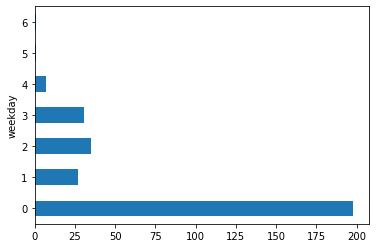

In [47]:
df.groupby('weekday')['id'].count().plot(kind = 'barh')

In [49]:
df[df['name'].str.contains('СберЧат')]

,id,name,description,skills,published_at,weekday
295,73322458,DevOps инженер (СберЧат),"<p>Приглашаем Middle / Senior DevOps инженера,...","Linux,Python,Bash,PostgreSQL,SQL,Kubernetes,Do...",2022-12-05 11:34:01+03:00,0
